# Depression Classifier
Attempts to determine if a given text displays signs of depression using [data from Reddit](https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned). Designed for PCYC.

Overall, this dataset appears pretty poorly made because there is a significant imbalance in the amount of text per row. Most categories labeled "depression" have entire paragraphs - the other ones are basic sentences (of which I assume are encouraging responses rather than entire posts). I would suggest crawling through polar opposite posts in completely different threads (ie: r/success or r/happy) to capture a better dataset.

Now using custom dataset.

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np

## 2. Import Dataset

In [4]:
ds = pd.read_csv("./datasets/depression_reddit_cleaned.csv")
X = ds["post_title"].values
y = ds["is_depression"].values

In [5]:
ds.head()

,id,post_title,is_depression
0,0,regular checkin post with information about ou...,1
1,1,our mostbroken and leastunderstood rules is he...,1
2,2,unpopular opinion i hate how after someone die...,1
3,3,i love being asleep i dont have to think or do...,1
4,4,wtf are antidepressants even supposed to do,1


### 2.1 Preprocess Inputs

In [6]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
import re

ss = SnowballStemmer(language="english")
english_words = set(stopwords.words())

def preprocess(text):
    text = re.sub(r"^[a-z]", "", text.lower()).split()
    text = [ss.stem(word) for word in text if word not in english_words]
    text = " ".join(text)

    return text

In [7]:
X = [preprocess(text) for text in X]

### 2.2 Split Dataset

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 Vectorize Words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

## 3. Create Model

In [10]:
from sklearn.svm import SVC

classifier = SVC(kernel="rbf", random_state=42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

### 3.1 Evaluate Performance

In [11]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
print(f"accuracy score = {accuracy_score(y_test, y_pred):.2f}")

accuracy score = 0.86


<AxesSubplot:>

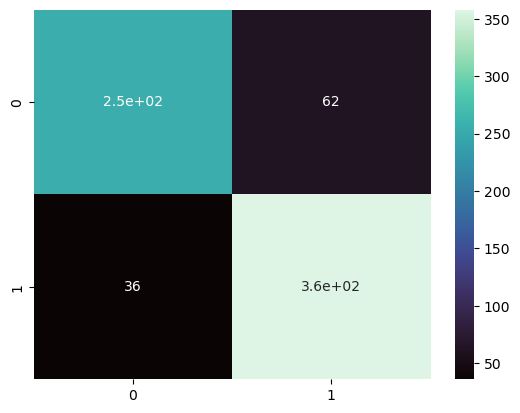

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="mako")

### 3.2 Make a Prediction

In [13]:
def predict(text):
    text =  cv.transform([preprocess(text)]).toarray()
    return classifier.predict(text)

In [16]:
predict("I'm worthless.")

array([1], dtype=int64)

In [15]:
predict("My dog died today.")

array([0], dtype=int64)